# Geofísica Matemática y Computacional

# Transferencia de calor
## Conducción estacionaria - Modelo 1D

## Alumna: Karina A. Rodríguez Ramírez

## Fecha de entrega: 1 de octubre del 2021

### Modelo conceptual

Se calculará la transferencia de calor por conducción de calor en un modelo unidimensional y estacionario en una dirección.

La Ley de Fourier se utiliza para modelar esta distribución de temperaturas.

Se considera que no hay flujo de calor en las paredes horizontales.
Temperatura TA y TB fijas en los extremos.

No se consideran fuentes ni sumideros.

T = temperatura al interior del dominio.

x = distancia horizontal

L = Longitud

$\kappa$ = conductividad térmica

### Modelo matemático

La Ley de Fourier en 1D se describe como sigue:

$-\kappa \frac{d^2T}{dx^2}=S$ ... (1)

Las condiciones de frontera son de tipo Dirichlet, donde $T$ es una variable dependiente, con fronteras definidas como:

$T(x = 0) = T_A$

$T(x = L) = T_B$

donde:

$\kappa$ = conductividad térmica (constante)

$T$ = temperatura

$x$ = dominio en x

$S$ = Fuentes o sumideros

$T_A$ = Condición de frontera izquierda

$T_B$ = Condición de frontera derecha

### Modelo numérico
#### Discretización espacial
Dominio de solución:

Se realiza la discretización del dominio como en la siguiente imagen:

<IMG SRC="https://drive.google.com/uc?export=download&id=1im9QW3yokI_0YOxwk63Q_pmvQAPDTPh5">

Se divide el dominio en pequeños subdominios (en este caso son 5).

El número de nodos es 6, ya que se comienza la numeración en cero.

Los nodos en donde se calcula la temperatura son los que se encuentran al interior, es decir, en solo 4 nodos (de 1 a N = 4). -Cuadros amarillos de la imagen-.

Los nodos de los extremos (0 y 5) estarán dados por las condiciones de frontera (en 0 y N+1). -Cuadros naranjas-

#### Discretización de las ecuaciones

Se discretiza la función de la ecuación de la Ley de Fourier utilizando diferencias finitas de segundo orden.

La discretización de la derivada se describe como:

$\frac{d^2T}{dx^2}|_{i}=\frac{T_{i+1}-2T_i+T_{i-1}}{h^2}+O(h^2)$  ... (2)

Sustituyendo (2) en (1):

$-\kappa_i(\frac{T_{i+1}-2T_i+T_{i-1}}{h^2})=S_i$ ... (3)

Que se reescribe como:

$-r_iT_i+1 + 2r_iT_i-r_iT_i-1 = S_i$

en donde: $r=\frac{k_i}{h^2}$

$i$ representan los nodos

De escribe una ecuación para cada uno de esos nodos:
 
$-r_1T_0 + 2r_1T_1 - r_1T_2 = S_1$

$-r_2T_1 + 2r_2T_2 - r_2T_3 = S_2$
 
$-r_3T_2 + 2r_3T_3 - r_3T_4 = S_3$
   
$-r_4T_3 + 2r_4T_4 - r_4T_5 = S_4$

Se incorporan las condiciones de frontera, teniendo en cuenta que:

$i = 1$, se tiene $T_0 = T_A$

Y para $i = N = 4$, se tiene, $T_{N+1} = T_B$

Entonces:

   $-r_1T_0 + 2r_1T_1 - r_1T_2 = S_1$
   
   $-r_1T_A + 2r_1T_1 - r_1T_2 = S_1$
   
   $2r_1T_1 - r_1T_2 = S_1 + r_1T_A$
   
Y,

   
   $-r_NT_{N-1} + 2r_NT_N - r_NT_{N+1} = S_N$
   
   $-r_NT_{N-1} + 2r_NT_N - r_NT_{B} = S_N$
   
   $-r_4T_{3} + 2r_4T_4  = S_4 + r_4T_{B}$

Finalmente, el sistema de ecs, con las condiciones de frontera incorporadas, para los nodos del 1 al 4, se escribe como:

   $2r_{1}T_{1}-r_{1}T_{2} = S_{1} + r_{1}T{A} $

   $-r_2T_1 + 2r_2T_2-r_2T_3 = S_2$

   $-r_3T_2 + 2r_3T_3-r_3T_4 = S_3$

   $-r_4T_3 + 2r_4T_4 = S_4 + r_4T_B$
   
Que, de forma matricial se escribe como:

   $\begin{bmatrix}{2}&{-1}&{0}&{0}\\{-1}&{2}&{-1}&{0}\\{0}&{-1}&{2}&{-1}\\{0}&{0}&{-1}&{2}\end{bmatrix}
   \begin{bmatrix}{T_1}\\{T2}\\{T_3}\\{T_4}\end{bmatrix} = \frac{1}{r} \begin{bmatrix}{S_1}\\{S_1}\\{S_3}\\{S_4}\end{bmatrix} +        \begin{bmatrix}{T_A}\\{O}\\{0}\\{T_B}\end{bmatrix}$
   
donde:

$r = \kappa / h^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el estilo de las gráficas
# Si tienes instalado LaTeX, lo siguiente hace los textos 
# más estilizados. Si no tienes LaTeX, debes comentar la 
# línea: 'text.usetex': True
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
      #    'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [2]:
def buildMatrix(N):
    """
    Función que genera una matriz de tamaño N X N 

    Parameters
    ----------
    N : ENTERO
        TAMAÑO DE LA MATRIZ (RENGLONES = COLUMNAS)

    Returns
    -------
    A : MATRIZ
        MATRIZ GENERADA

    """
    #Matriz de ceros
    A = np.zeros((N,N))
    
    #Primer renglón
    A[0,0] = 2
    A[0,1] = -1
    #Renglones interiores
    for i in range (1, N-1):
        A [i,i] = 2
        A [i,i+1] = -1
        A [i,i-1] = -1
    #Último renglón
    A [N-1,N-2] = -1
    A [N-1,N-1] = 2
       
       
    return A

In [3]:
#Parámetros físicos
L = 1.0
TA = 1
TB = 0
k = 1.0
S = 0.0

#Parámetros numéricos
N = 4
h = L / (N+1)
r = k / h**2

[1.  0.8 0.6 0.4 0.2 0. ]


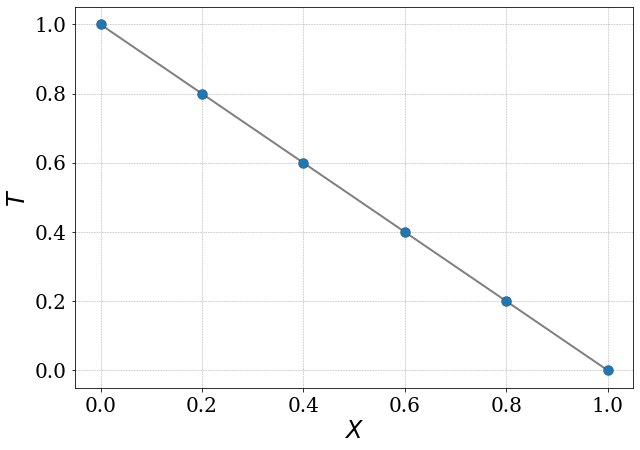

In [4]:
#Arreglo para almacenar la solución
T = np.zeros (N+2)
T[0]  = TA  #Frontera Izquierda
T[-1] = TB  #Frontera derecha

#Lado derecho del sistema
b = np.zeros(N)
b[:] = S / r  #Fuente o Sumidero
b[0] += T[0]  #Condición de frontera
b[-1] += T[-1] #Condición de frontera
#Construcción de la matriz
A = buildMatrix(N)

#Solución del sistema lineal
T[1:N+1] = np.linalg.solve(A,b)

#Impresión y graficación de la solución
print(T)
x = np.linspace(0, L, N+2)
plt.figure(figsize=(10,7))
plt.plot(x, T, c="grey", lw=2.0)
plt.scatter(x, T, edgecolors="k", zorder= 10)
plt.xlabel("$X$")
plt.ylabel("$T$")
plt.grid()
plt.show()


### Solución analítica
$T(x)=(\frac{TB-TA}{L}+\frac{S}{2K}(L-x))x+T_A$

#### Explicación de gráfica
Si no existe alguna fuente o sumidero, es decir, esta es igual a cero;
Entonces:
$T(x)=(\frac{TB-TA}{L})x+T_A$

Comparando la ec. anterior con la ecuación de una recta:

$y=mx+b$

La pendiente estaría representada por el término: $\frac{TB-TA}{L}$ y la ordenada al origen por $T_A$

Si no existe alguna fuente o sumidero de calor, no hay distribución de calor.


In [10]:
#Cálculo de la solución analítica

def solExact(x, TA, TB, k, L, S):
    """
    Cálculo de la solución exacta

    Parameters
    ----------
    x : VECTOR
        CONTIENE EL DOMINIO DE LA DISTANCIA.
    TA : FLOAT
        CONDICIÓN DE FRONTERA INICIAL O IZQUIERDA.
    TB : FLOAT
        CONDICIÓN DE FRONTERA FINAL O DERECHA.
    k : FLOAT
        CONDUCTIVIDAD TÉRMICA.
    L : FLOAT
        LONGITUD TOTAL.
    S : FLOAT
        FUENTE O SUMIDERO.

    Returns
    -------
    SOLUCIÓN EN UN ARREGLO

    """
    return((TB-TA)/L+(S/(2*k))*(L-x))*x+TA

In [11]:
#Cálculo de la solución numérica

def solNum(L, N, k, S, A, b, T, etiqueta):
    """
    Cálculo de la solución numérica
    Parameters
    ----------
    L : FLOAT
        LONGITUD TOTAL.
    N : ENTERO
        TAMAÑO DE LA MATRIZ (RENGLONES = COLUMNAS)
    k : FLOAT
        CONDUCTIVIDAD TÉRMICA.
    S : FLOAT
        FUENTE O SUMIDERO.
    A : MATRIZ
        MATRIZ A RESULTADO DE BUILDMATRIX .
    b : ARREGLO
        VECTOR DE CONDICIONES DE FRONTERA Y FUENTE.
    T : ARREGLO
        VECTOR DE LA SOLUCIÓN DEL SISTEMA
    etiqueta : STRING
        ETIQUETA DE LAS GRÁFICAS.

    Returns
    -------
    None.

    """
    h = L / (N+1)
    r = k / h **2
    
    #Lado derecho del sistema
    b = np.zeros(N)
    b[:] = S / r
    b[0] += T[0]
    b[-1] += T[-1]
    
    #Solución del sistema lineal
    T[1:N+1] = np.linalg.solve(A, b)
    
    #Impresión y graficación de la solución
    x = np.linspace(0, L, N+2)
    
    #Construcción de la etiqueta de cada gráfica
    if etiqueta == 'L':
        etiqueta = '$L$ = {:3.2f}'.format(L)
    elif etiqueta == 'k':
        etiqueta = '$k$ = {:3.2f}'.format(k)
    elif etiqueta == 'S':
        etiqueta = '$S$ = {:3.2f}'.format(S)

    #Se grafican los puntos de la solución
    plt.scatter(x, T, edgecolor='k', s=50, zorder=10, label=etiqueta)

In [12]:
#Función para la graficación

def plotSol(title):
    """
    Función para la graficación

    Parameters
    ----------
    title : STRING
        TÍTULO Y ESPECIFICACIONES DEL FORMATO DEL GRÁFICO.

    Returns
    -------
    None.

    """
    plt.suptitle('Conducción estacionaria',fontsize=24,y=0.94,va='center_baseline')
    plt.title(title, fontsize=20, color='blue')
    plt.ylabel('$T$')
    plt.xlabel('$x$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.grid()
    plt.show()

### Se varía la longitud del dominio (L):

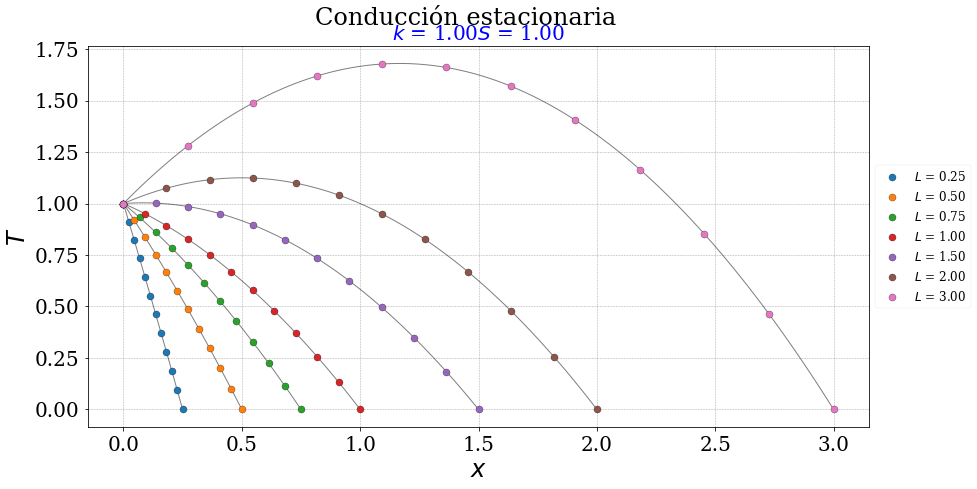

In [13]:
# Parámetros físicos
l = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0]
TA = 1.0
TB = 0.0
k = 1.0
S = 1.0

#Parámetros numéricos
N = 10

#Arreglo para almacenar la solución
T = np.zeros(N+2)
T[0] = TA  #Frontera izquierda
T[-1] = TB #Frontera derecha

#Construcción de la matriz
A = buildMatrix(N)

for L in l:
    solNum(L, N, k, S, A, b, T, 'L')
    xe = np.linspace(0,L,100)
    plt.plot(xe,solExact(xe, TA, TB, k, L, S), 'k-', lw=1.0, alpha=0.5)
    
plotSol('$k$ = {:3.2f}'.format(k) + '$S$ = {:3.2f}'.format(S))

#### Explicación de la gráfica de conducción de calor estacionaria variando la longitud del dominio:

$T(x)=(\frac{TB-TA}{L}+\frac{S}{2K}(L-x))x+T_A$

Dado que la fuente se encuentra después de 1 unidad en el dominio, las curvas correspondientes a una longitud menor, tienen una tendencia lineal; por otro lado, las curvas correspondientes a longitudes mayores a la unidad, muestran una curvatura que representa la existencia de una fuente.


### Se varía la conductividad térmica:

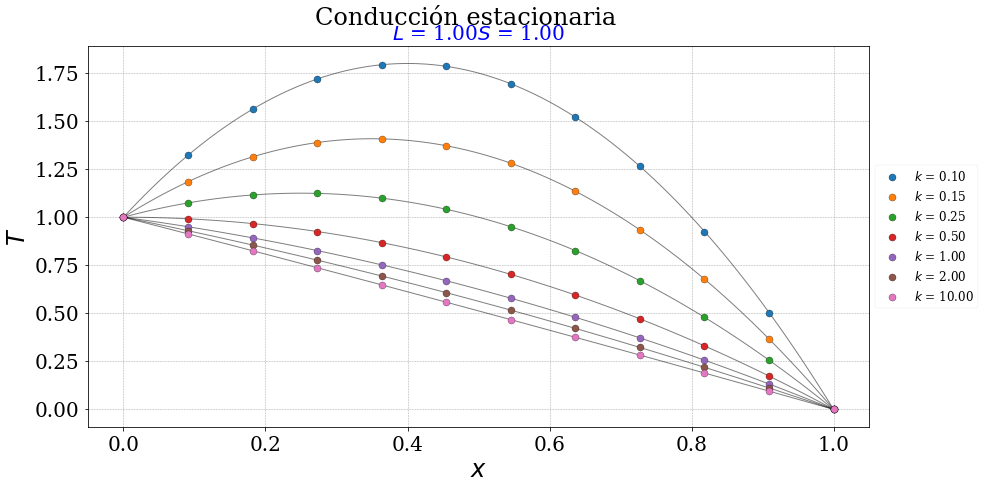

In [14]:
# Parámetros físicos
L1 = 1.0
TA = 1.0
TB = 0.0
K = [0.1, 0.15, 0.25, 0.5, 1.0, 2.0, 10]
S1 = 1.0

#Parámetros numéricos
N = 10

#Arreglo para almacenar la solución
T1 = np.zeros(N+2)
T1[0] = TA  #Frontera izquierda
T1[-1] = TB #Frontera derecha

#Construcción de la matriz
A1 = buildMatrix(N)

for k in K:
    solNum(L1, N, k, S1, A1, b, T1, 'k')
    xe = np.linspace(0,L1,100)
    plt.plot(xe,solExact(xe, TA, TB, k, L1, S1), 'k-', lw=1.0, alpha=0.5)
    
plotSol('$L$ = {:3.2f}'.format(L1) + '$S$ = {:3.2f}'.format(S1))

### Explicación de la gráfica de conducción de calor estacionaria variando conductividad térmica

Tomando en cuenta la solución analítica:

$T(x)=(\frac{TB-TA}{L}+\frac{S}{2K}(L-x))x+T_A$

Si $\kappa$ tiende a infinito, y el término $\frac{S}{2K}(L-x)$ se elimina y el fenómeno resulta ser lineal.

Si $\kappa$ tiende a cero, la ecuación resulta ser de segundo orden, por lo que el fenómeno tiene un comportamiento parabólico.

Mientras la conductividad $\kappa$, sea mayor, el material será más conductivo, y la transferencia de calor por conducción será uniforme o lineal, en tanto, la conductividad sea menor, la transferencia de calor será menos uniforme a lo largo del material.


### Se varía la fuente o sumidero:

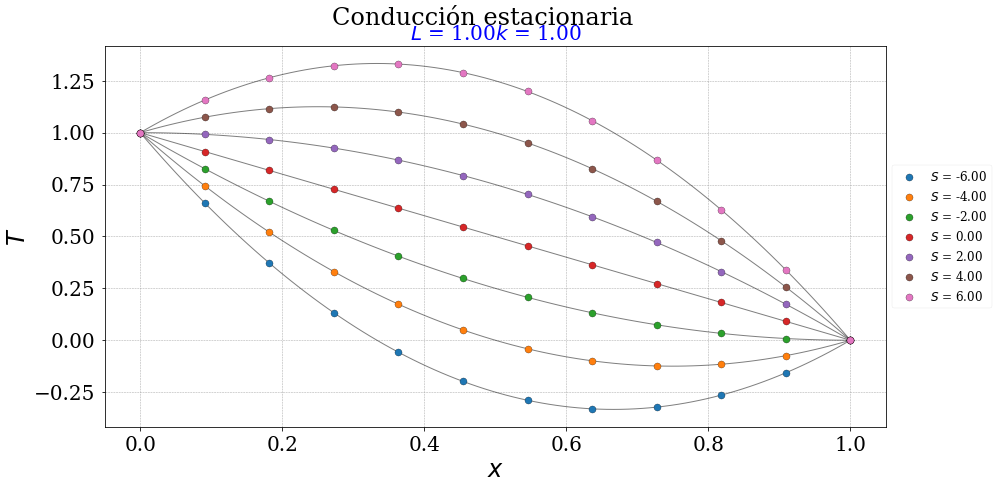

In [15]:
# Parámetros físicos
L2 = 1.0
TA = 1.0
TB = 0.0
k2 = 1.0
s = [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]


#Parámetros numéricos
N = 10

#Arreglo para almacenar la solución
T2 = np.zeros(N+2)
T2[0] = TA  #Frontera izquierda
T2[-1] = TB #Frontera derecha

#Construcción de la matriz
A2 = buildMatrix(N)

for S in s:
    solNum(L2, N, k2, S, A2, b, T2, 'S')
    xe = np.linspace(0,L1,100)
    plt.plot(xe,solExact(xe, TA, TB, k2, L2, S), 'k-', lw=1.0, alpha=0.5)
    
plotSol('$L$ = {:3.2f}'.format(L2) + '$k$ = {:3.2f}'.format(k2))

### Explicación de la gráfica de conducción de calor estacionaria variando conductividad térmica

$T(x)=(\frac{TB-TA}{L}+\frac{S}{2K}(L-x))x+T_A$

Tomando de la solución analítica, si $S$ es negativa, es decir, es un sumidero, la gráfica representa la pérdida de calor, que muestra una parábola abierta hacia arriba. 

En tanto, si no existe fuente o sumidero, la gráfica es lineal.

Finalmente, si $S$ es positiva, existe una fuente, la cual representa una ganancia de calor que se grafica como una parábola abierta hacia abajo.